In [ ]:
from perceval.components import PS, BS
import perceval as pcvl
import numpy as np

num_modes = 6
circuit = pcvl.Circuit(m = num_modes)
sum = - 1
for i in range(1, num_modes):
    for j in range(1, i + 1):
        sum += 1
        circuit = circuit // (num_modes - 2 - i + j, BS.H(pcvl.P(f'theta{sum}')))

cnot_params = circuit.get_parameters()
backend = pcvl.SLOSBackend()

#state 00 : 44
#state 01 : 50
#state 10 : 79
#state 11 : 85

state_00 = pcvl.BasicState([1,0,1,0,1,1])
state_01 = pcvl.BasicState([1,0,0,1,1,1])
state_10 = pcvl.BasicState([0,1,1,0,1,1])
state_11 = pcvl.BasicState([0,1,0,1,1,1])

def loss(params):
    for i in range(len(params)):
        cnot_params[i].set_value(params[i])
    backend.set_circuit(circuit)
    probs = []
    targets = [1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    return -(np.log(backend.all_prob(state_00)[44]) + np.log(backend.all_prob(state_01)[50]) + np.log(backend.all_prob(state_10)[85]) + np.log(backend.all_prob(state_11)[79]))

from scipy.optimize import minimize, OptimizeResult

init_params = np.random.default_rng().random(size = (len(cnot_params)))
arr = []
def callback(intermediate_result: OptimizeResult):
    print(intermediate_result.fun)
    arr.append(intermediate_result.fun)

res = minimize(loss, init_params, method = "L-BFGS-B", callback = callback)
    

5.364756857338356
4.129330492167227
3.016831199254504
2.8218101101248463
2.793199385605226
2.7890785928168373
2.784777117299078
2.7823942635431242
2.7804772680666
2.7779637615593087
2.7753762942870295
2.7732727838240114
2.7730231340445055
2.7728277003510082
2.772812440869514
2.7728038212928414
2.772788937738075
2.772752748333018
2.7727376030385074
2.772717924092741
2.772700012461403
2.7726952206190005
2.7726900530054817
2.7726771109942137
2.772672004921315
2.772649683886064
2.772614377898414
2.772593387176717
2.77259167271731
2.77258918095015
2.772588897780844
2.7725887748881366
2.7725887596678924
2.7725887255161874
2.7725887224124692


In [21]:
from perceval.algorithm import Analyzer
opt_params = res.x
analyser = Analyzer(pcvl.Processor(pcvl.SLOSBackend(),circuit),[state_00, state_01, state_10, state_11])
pcvl.pdisplay(analyser)

,"|1,0,1,0,1,1>","|1,0,0,1,1,1>","|0,1,1,0,1,1>","|0,1,0,1,1,1>"
"|1,0,1,0,1,1>",1/2,1/2,0,0
"|1,0,0,1,1,1>",1/2,1/2,0,0
"|0,1,1,0,1,1>",0,0,1/2,1/2
"|0,1,0,1,1,1>",0,0,1/2,1/2


In [8]:
opt_params

array([ 7.18543508e-01, -1.86200239e-01,  6.40166003e-01,  5.38478728e-04,
        2.42398424e-01,  5.35825220e-01,  4.36290197e-03, -1.92463392e-02,
        1.03638888e-02,  8.26078809e-01,  5.18065583e-06, -4.36615258e-03,
        1.76109096e-02, -9.72877408e-02,  4.24618661e-01])

<IPython.core.display.Math object>

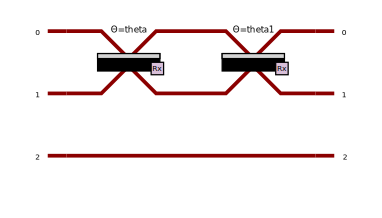

In [39]:
## to understand the conventions, you can note that a BS.Rx with the 4 phases phi (top left/right and bottom left/right) can be represented like that

bs_rx_circuit=pcvl.Circuit(3)  // BS(theta=pcvl.P('theta')) 

bs_rx_circuit = bs_rx_circuit // BS(theta = pcvl.P(f'theta{1}'))

pcvl.pdisplay(bs_rx_circuit.U)

# we can check it's the same as bs_rx.definition()
#pcvl.pdisplay(bs_rx_circuit)

## For this cell, we needed the syntax to builds circuits... Good transition !
pcvl.pdisplay(bs_rx_circuit)
